In [64]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
import pickle


In [65]:
# Cargar datos

df = pd.read_csv('../data/atico.csv')
# df_train = pd.read_csv('../data/train.csv', index_col= [0])
# df_test = pd.read_csv('../data/test.csv', index_col= [0])
# df_test_dias = pd.read_csv('../data/test_dias_naturales.csv', index_col= [0])

In [66]:
# Separar X e Y

df = df[df['Atico'] == 1]

# X = df.drop(columns= ['price', 'bedrooms', 'restrooms', 'Planta', 'Ascensor', 'Atico', 'Apartamento', 'Chalet'])
# X = df.drop(columns= ['price', 'Atico', 'Apartamento', 'Chalet'])
X = df[['surface', 'bedrooms', 'restrooms']]
Y = df['price']

# X_train = df_train.drop(columns= ['€/dia'])
# Y_train = df_train['€/dia']

# X_test = df_test.drop(columns= ['€/dia'])
# Y_test = df_test['€/dia']

# X_test_dias = df_test_dias.drop(columns= ['€/dia'])
# Y_test_dias = df_test_dias['€/dia']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state= 51)

In [68]:
X.head()

,surface,bedrooms,restrooms
0,25,-1,1
1,70,-1,1
2,30,-1,1
3,45,-1,1
4,61,-1,1


In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   surface    2347 non-null   int64
 1   bedrooms   2347 non-null   int64
 2   restrooms  2347 non-null   int64
dtypes: int64(3)
memory usage: 73.3 KB


In [70]:
model = RandomForestRegressor(max_depth= 4, n_estimators= 100)

model.fit(X_train, Y_train)

mean_absolute_error(model.predict(X_train), Y_train)

283.9879413935075

In [71]:
mae = mean_absolute_error(model.predict(X_test), Y_test)

mae

298.8732614288321

In [72]:
pickle.dump(model, open('../models/model.pkl', 'wb'))

In [39]:
# Construir pipeline y probar modelos

pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

#Primer modelo del pipeline
random_forest_params = {
    'regressor': [RandomForestRegressor()],
    'regressor__n_estimators': [20, 25, 30, 35, 40, 45, 50],
    'regressor__max_depth': [1, 2, 3]
}                                                                                   

#Segundo modelo del pipeline
linear_regressor_params = {
    'regressor': [LinearRegression()]
}

#Tercer modelo del pipeline
lasso_params = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'regressor': [Lasso()],
    'regressor__alpha': np.logspace(-4, 3, 100).tolist(),
    'regressor__max_iter': [50000, 100000, 200000]
}

#Cuarto modelo del pipeline
ridge_params = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'regressor': [Ridge()],
    'regressor__alpha': np.logspace(-4, 3, 100).tolist(),
    'regressor__max_iter': [50000, 100000, 200000]
} 

#Quinto modelo del pipeline
xgb_params = {
    'regressor': [XGBRegressor()],
    'regressor__n_estimators': [20, 25, 30, 35, 40, 45, 50],
    'regressor__max_depth': [1, 2, 3],
    'regressor__learning_rate': [0.01, 0.1, 0.2] 
} 

#Lista de todos los clasificadores con sus parámetros
search_space = [
    random_forest_params, linear_regressor_params,
    lasso_params, ridge_params,
    xgb_params
]


clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  n_jobs= 6,
                  cv = 5, 
                  scoring= 'neg_mean_absolute_error')

#Se entrena el gridsearch
clf.fit(X_train, Y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.356e+08, tolerance: 8.815e+04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+08, tolerance: 9.397e+04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+08, tolerance: 9.177e+04
  model = cd_fast.enet_

KeyboardInterrupt: 

In [5]:
# Parámetros del mejor modelo

clf.best_params_

{'regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 'regressor__learning_rate': 0.2,
 'regressor__max_depth': 3,
 'regressor__n_estimators': 50}

In [6]:
# MAE en train

mean_absolute_error(Y_train, clf.predict(X_train))

0.1708259868939472

In [7]:
# MAE en test

mean_absolute_error(Y_test, clf.predict(X_test))

0.214774165885152

In [8]:
# MAE en test con días naturales

mean_absolute_error(Y_test_dias, clf.predict(X_test_dias))

0.16953938882679595

''

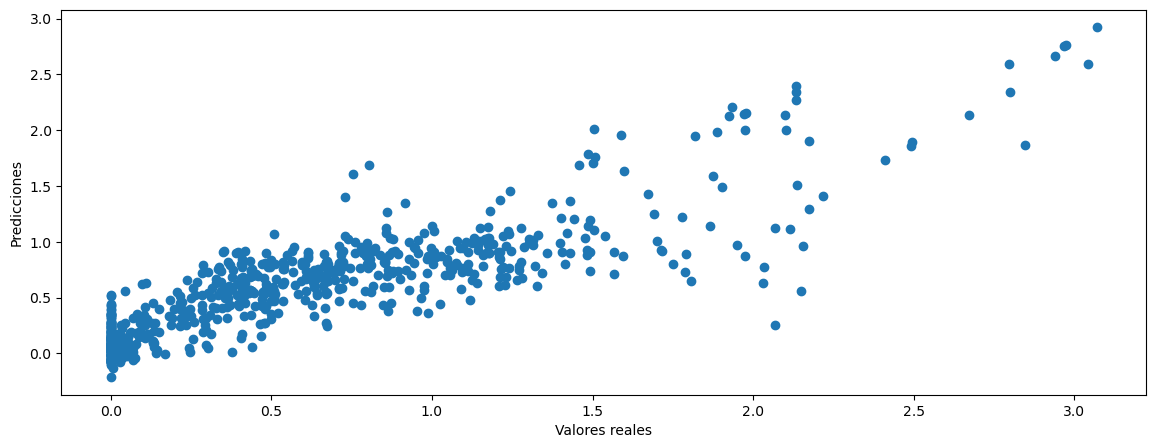

In [9]:
# Gráfica de dispersión de valores reales vs predicciones en test

plt.figure(figsize= (14, 5))
plt.scatter(Y_test, clf.predict(X_test))
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
;

In [11]:
model = clf.best_estimator_
pickle.dump(model, open('../model/modelo_david.pkl', 'wb'))